In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


In [68]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

In [69]:
import os
os.getcwd()
os.chdir('/home/piai/바탕화면/유아용품')

In [70]:
df_raw = pd.read_csv('Product_data.csv',encoding='euc-kr')
df_raw

,물품대분류,상품명,물품판매량,제품단가
0,FC,(1+1) 좋은느낌 입는 오버나이트 대형 8개입,15,0
1,FC,(1+1) 좋은느낌 입는 오버나이트 중형 8개입,10,0
2,FC,(1+1) 화이트 입는 오버나이트 대형 L 8개입 (EA),27,0
3,FC,(1+1) 화이트 입는 오버나이트 중형 M 8개입 (EA),12,0
4,FC,(핫딜위크/1+1) 좋은느낌 입는 오버나이트 대형 8개입,4,0
...,...,...,...,...
3043,팬티,하기스 에어솔솔 썸머팬티 6단계 여아용 68매(팬티형),4,47360
3044,팬티,하기스 에어솔솔 팬티 4단계 남아용 96매(팬티형),18,71040
3045,팬티,하기스 에어솔솔 팬티 4단계 여아용 96매(팬티형),17,66861
3046,팬티,하기스 에어솔솔 팬티 5단계 남아용 80매(팬티형),81,68994


In [71]:
df_raw.isnull().sum()

물품대분류    0
상품명      0
물품판매량    0
제품단가     0
dtype: int64

In [72]:
df_raw.columns

Index(['물품대분류', '상품명', '물품판매량', '제품단가'], dtype='object')

In [73]:
# df_raw = df_raw.drop(columns=[' '])
df_raw

,물품대분류,상품명,물품판매량,제품단가
0,FC,(1+1) 좋은느낌 입는 오버나이트 대형 8개입,15,0
1,FC,(1+1) 좋은느낌 입는 오버나이트 중형 8개입,10,0
2,FC,(1+1) 화이트 입는 오버나이트 대형 L 8개입 (EA),27,0
3,FC,(1+1) 화이트 입는 오버나이트 중형 M 8개입 (EA),12,0
4,FC,(핫딜위크/1+1) 좋은느낌 입는 오버나이트 대형 8개입,4,0
...,...,...,...,...
3043,팬티,하기스 에어솔솔 썸머팬티 6단계 여아용 68매(팬티형),4,47360
3044,팬티,하기스 에어솔솔 팬티 4단계 남아용 96매(팬티형),18,71040
3045,팬티,하기스 에어솔솔 팬티 4단계 여아용 96매(팬티형),17,66861
3046,팬티,하기스 에어솔솔 팬티 5단계 남아용 80매(팬티형),81,68994


In [74]:
print(df_raw.dtypes)

물품대분류    object
상품명      object
물품판매량     int64
제품단가      int64
dtype: object


In [75]:
# 각 변수의 고유한 값 개수 및 샘플 확인
# 한번씩 그냥 확인해보기 잘못된 샘플이 없는지

unique_values_summary = {
    "변수명": [],
    "고유값 개수": [],
    "샘플 값": []
}

for col in df_raw.columns:
    unique_values_summary["변수명"].append(col)
    unique_values_summary["고유값 개수"].append(len(df_raw[col].unique()))
    unique_values_summary["샘플 값"].append(df_raw[col].unique()[:5])  # 처음 5개 샘플 값

# 데이터프레임으로 변환
unique_values_df = pd.DataFrame(unique_values_summary)
unique_values_df

,변수명,고유값 개수,샘플 값
0,물품대분류,10,"[FC, FMC, SKC, SrC, 기저귀]"
1,상품명,2975,"[(1+1) 좋은느낌 입는 오버나이트 대형 8개입, (1+1) 좋은느낌 입는 오버나..."
2,물품판매량,370,"[15, 10, 27, 12, 4]"
3,제품단가,1850,"[0, 15000, 18660, 35500, 24800]"


In [76]:
# 상관관계 분석
correlation = df_raw[['물품판매량', '제품단가']].corr()

print(correlation)

          물품판매량      제품단가
물품판매량  1.000000 -0.008785
제품단가  -0.008785  1.000000


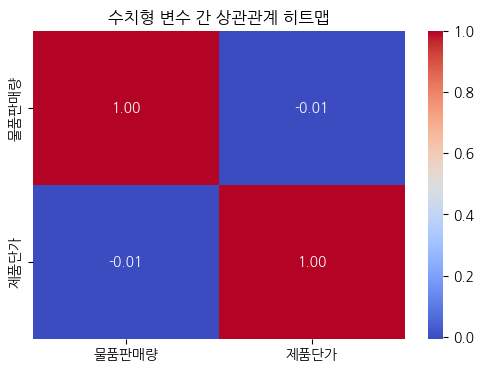

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(df_raw[['물품판매량', '제품단가']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('수치형 변수 간 상관관계 히트맵')
plt.show()

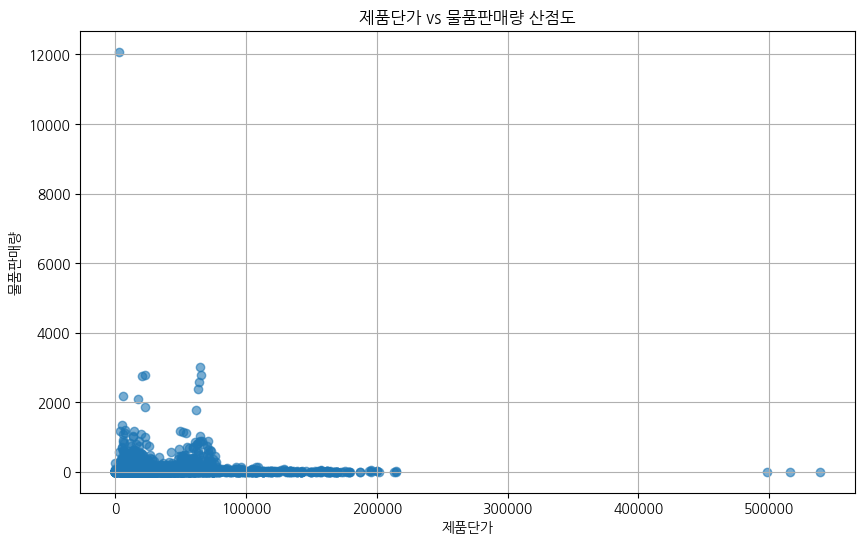

In [78]:
import matplotlib.pyplot as plt

# 예시 DataFrame 이름은 df_raw라고 가정합니다.
plt.figure(figsize=(10, 6))
plt.scatter(df_raw['제품단가'], df_raw['물품판매량'], alpha=0.6)
plt.title('제품단가 vs 물품판매량 산점도')
plt.xlabel('제품단가')
plt.ylabel('물품판매량')
plt.grid(True)
plt.show()

array([[<Axes: title={'center': '물품판매량'}>,
        <Axes: title={'center': '제품단가'}>]], dtype=object)

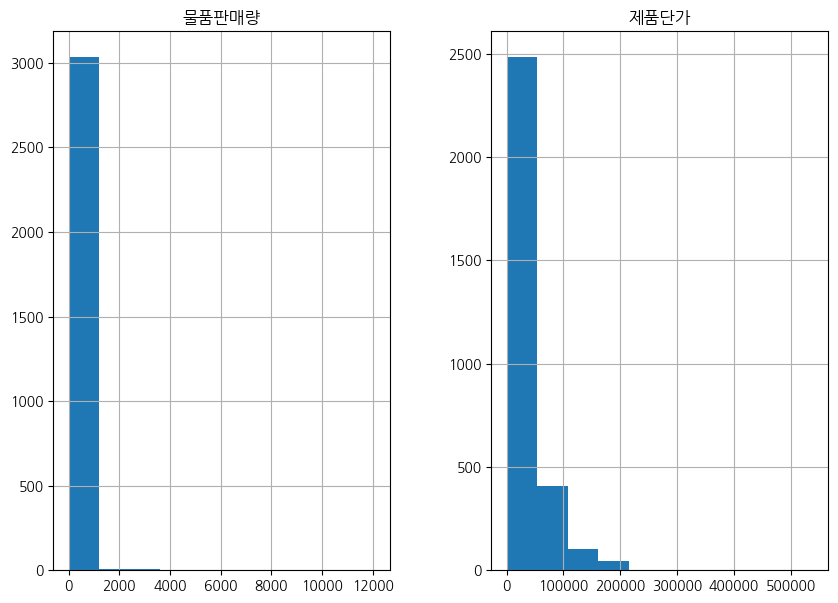

In [79]:
# hist(figsiz) : figsize = (x축 크기, y축 크기)-그래프 영역별 중첩 처리
df_raw.hist(figsize = (10,7))

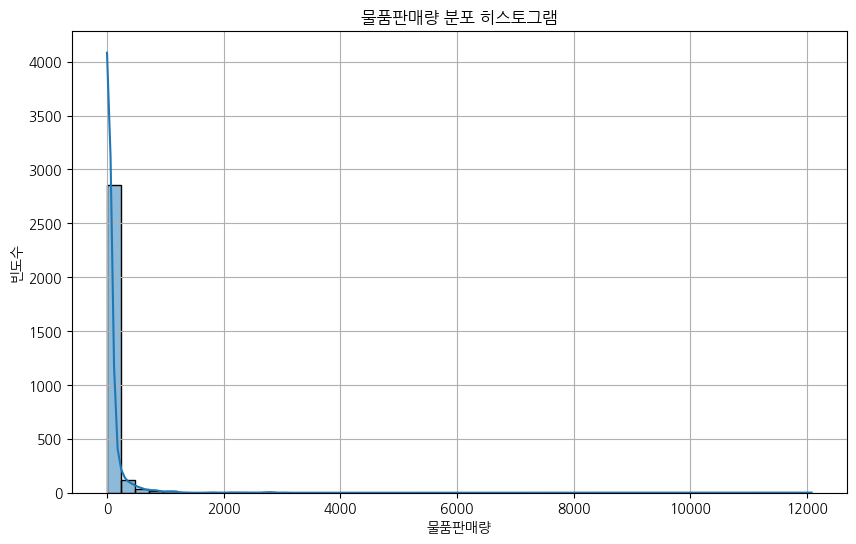

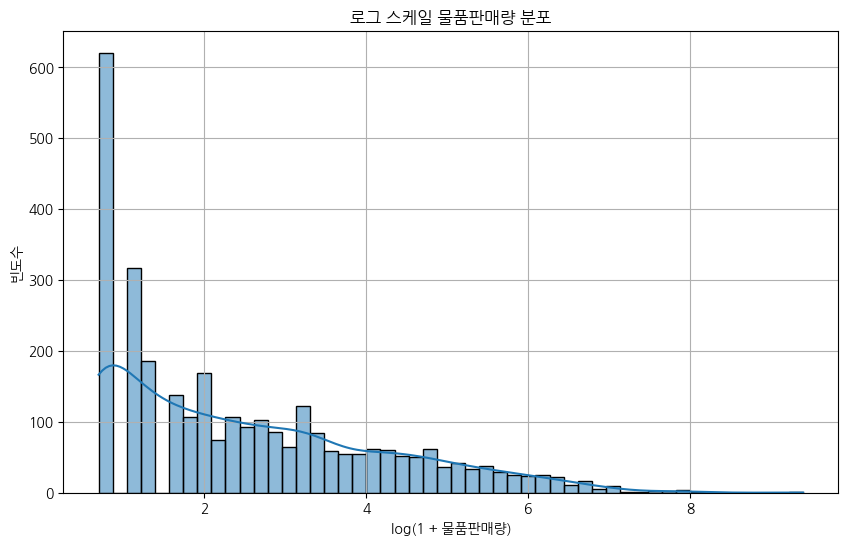

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_raw['물품판매량'], bins=50, kde=True)
plt.title('물품판매량 분포 히스토그램')
plt.xlabel('물품판매량')
plt.ylabel('빈도수')
plt.grid(True)
plt.show()

import numpy as np

plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df_raw['물품판매량']), bins=50, kde=True)
plt.title('로그 스케일 물품판매량 분포')
plt.xlabel('log(1 + 물품판매량)')
plt.ylabel('빈도수')
plt.grid(True)
plt.show()

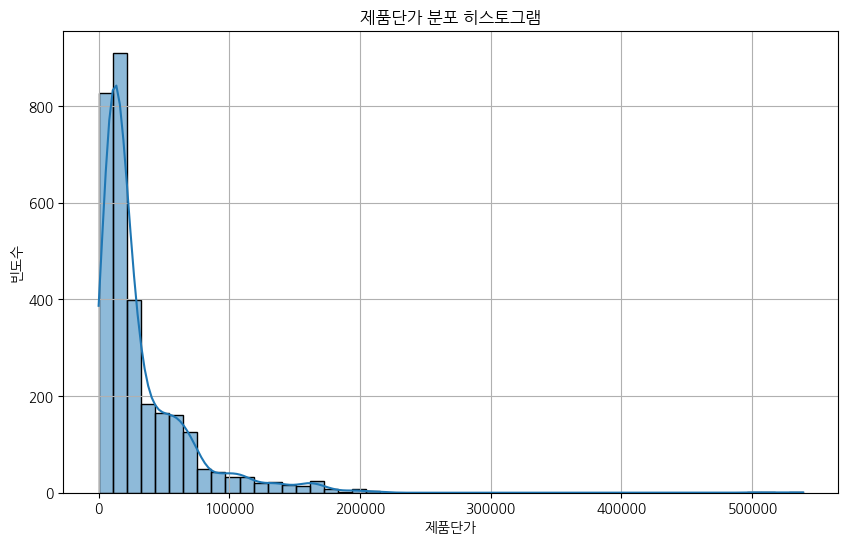

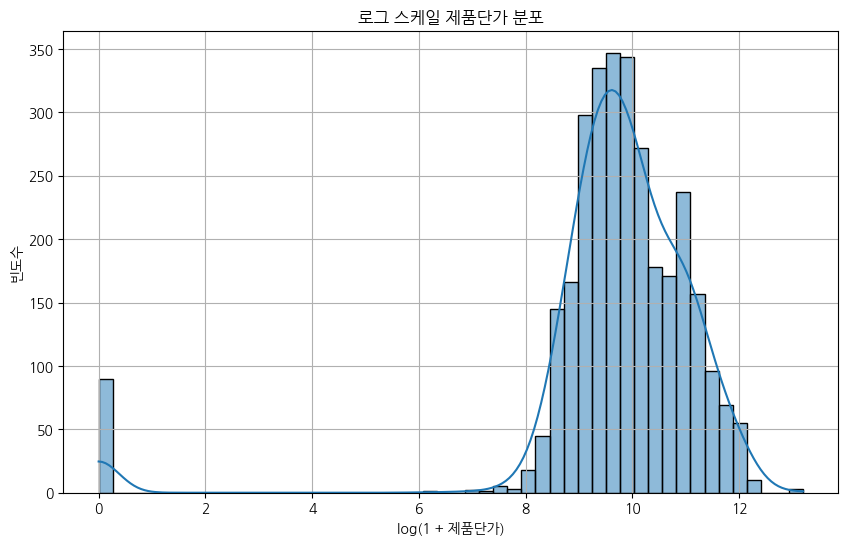

In [81]:
plt.figure(figsize=(10, 6))
sns.histplot(df_raw['제품단가'], bins=50, kde=True)
plt.title('제품단가 분포 히스토그램')
plt.xlabel('제품단가')
plt.ylabel('빈도수')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df_raw['제품단가']), bins=50, kde=True)
plt.title('로그 스케일 제품단가 분포')
plt.xlabel('log(1 + 제품단가)')
plt.ylabel('빈도수')
plt.grid(True)
plt.show()

In [82]:
df_raw['물품대분류'].value_counts()

기타      1245
더블하트     385
팬티       384
FC       255
FMC      225
기저귀      224
SKC      159
체험팩       89
물티슈       77
SrC        5
Name: 물품대분류, dtype: int64

In [83]:
df_raw['물품대분류'].unique()

array(['FC', 'FMC', 'SKC', 'SrC', '기저귀', '기타', '더블하트', '물티슈', '체험팩', '팬티'],
      dtype=object)

In [84]:
df_raw[['물품판매량', '제품단가']].describe()

,물품판매량,제품단가
count,3048.000000,3048.000000
mean,65.616470,32033.567913
std,291.006116,37526.291864
min,1.000000,0.000000
25%,2.000000,10138.000000
50%,7.000000,18254.000000
75%,33.000000,40198.000000
max,12077.000000,539000.000000


In [85]:
df_raw.groupby('물품대분류')[['물품판매량', '제품단가']].mean().sort_values('물품판매량', ascending=False)

,물품판매량,제품단가
물품대분류,,
체험팩,398.741573,7951.853933
기저귀,158.053571,84308.401786
FMC,115.448889,15453.755556
물티슈,109.805195,22150.415584
더블하트,96.867532,25225.337662
팬티,72.031250,68100.734375
SKC,58.987421,20983.672956
FC,48.768627,15466.890196
기타,6.339759,23757.938153


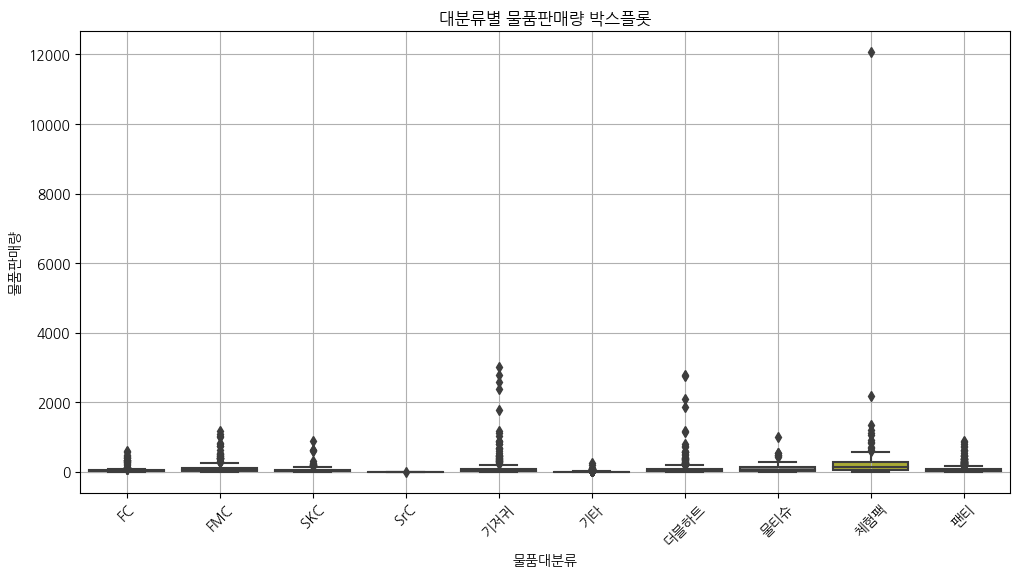

In [86]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_raw, x='물품대분류', y='물품판매량')
plt.title('대분류별 물품판매량 박스플롯')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [87]:
# 대분류별 중앙값
median_stats = df_raw.groupby('물품대분류')[['물품판매량', '제품단가']].median().sort_values('물품판매량', ascending=False)
print("대분류별 중앙값 통계:\n", median_stats)

대분류별 중앙값 통계:
        물품판매량     제품단가
물품대분류                
체험팩    146.0   6040.0
물티슈     47.0  19900.0
FMC     41.0  12045.0
더블하트    20.0  19800.0
FC      19.0  11760.0
SKC     17.0  18800.0
기저귀     15.0  68669.0
팬티      13.5  65758.0
SrC      2.0  18780.0
기타       2.0  16000.0


In [88]:
top5_sales = df_raw.sort_values('물품판매량', ascending=False).head(5)
print("판매량 기준 Top 5 상품:\n", top5_sales)

판매량 기준 Top 5 상품:
      물품대분류                            상품명  물품판매량   제품단가
2626   체험팩                        맘큐 허그박스  12077   3000
768    기저귀    하기스 네이처메이드 2단계 여아 156매(밴드형)   3010  64679
766    기저귀    하기스 네이처메이드 2단계 남아 156매(밴드형)   2792  65175
2194  더블하트  더블하트 SofTouch 모유실감 젖꼭지 L (2입)   2782  22730
2201  더블하트  더블하트 SofTouch 모유실감 젖꼭지 M (2입)   2767  20583


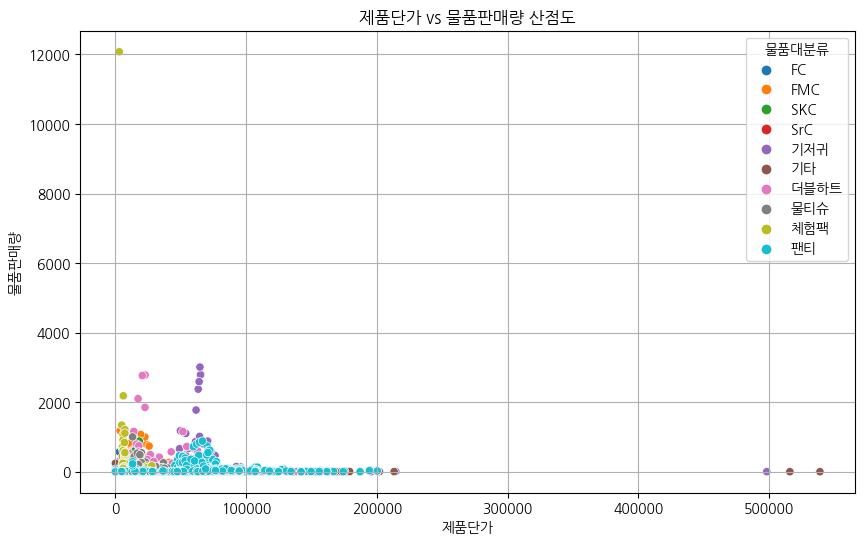

In [89]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_raw, x='제품단가', y='물품판매량', hue='물품대분류')
plt.title('제품단가 vs 물품판매량 산점도')
plt.xlabel('제품단가')
plt.ylabel('물품판매량')
plt.grid(True)
plt.show()

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# 1. 단가가 0보다 큰 데이터만 사용
df_cluster = df_raw[df_raw['제품단가'] > 0].copy()

# 2. log 변환한 판매량 추가
df_cluster['log_판매량'] = np.log1p(df_cluster['물품판매량'])

# 3. 클러스터링 변수 선택 및 정규화
X = df_cluster[['log_판매량', '제품단가']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. KMeans 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['클러스터'] = kmeans.fit_predict(X_scaled)

# 5. 결과 확인
print(df_cluster[['상품명', '물품판매량', '제품단가', '클러스터']].head())
print(df_cluster['클러스터'].value_counts())

                                      상품명  물품판매량   제품단가  클러스터
6   [1+1] 좋은느낌 라인프렌즈 유기농 순면 팬티라이너 롱 36 개입     24  15000     1
7          [1+1] 좋은느낌 팬티라이너 유기농 순면 롱 36개입     97  18660     1
8                        [대량발주] 택배파손_1224      1  35500     2
9        [동일상품 1+1] 화이트 입는 오버나이트 대형 L 8개입     26  24800     1
10       [동일상품 1+1] 화이트 입는 오버나이트 중형 M 8개입     15  24800     2
2    1725
1     960
0     273
Name: 클러스터, dtype: int64


In [91]:
print(df_cluster.shape)

(2958, 6)


In [92]:
df_cluster.groupby('클러스터')[['물품판매량', '제품단가']].mean()

,물품판매량,제품단가
클러스터,,
0,14.897436,124171.721612
1,194.521875,25878.447917
2,4.723478,22548.478261


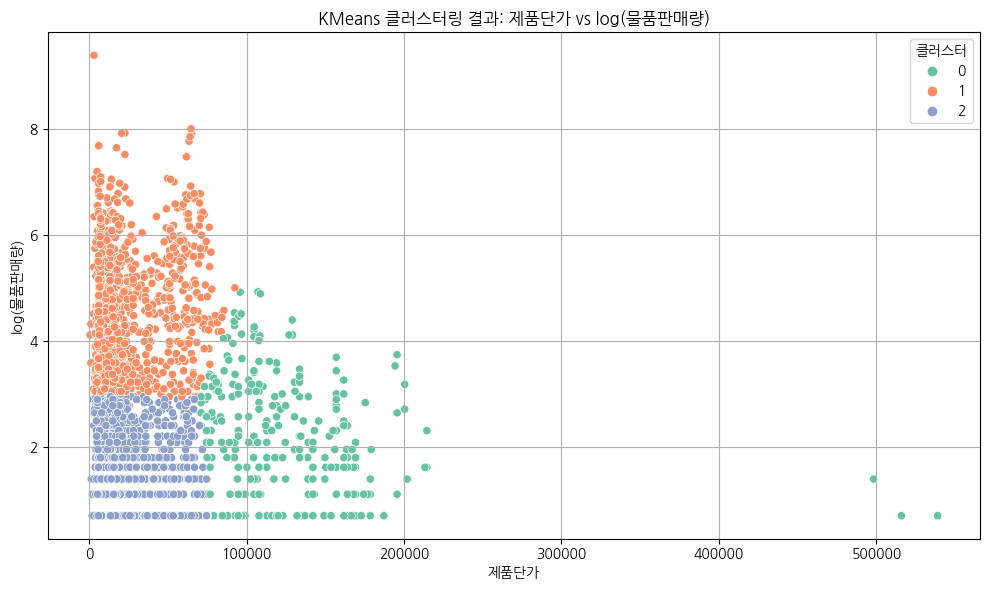

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화용 figure
plt.figure(figsize=(10, 6))

# 클러스터별 색상 구분 산점도
sns.scatterplot(
    data=df_cluster,
    x='제품단가',
    y='log_판매량',
    hue='클러스터',
    palette='Set2'
)

plt.title('KMeans 클러스터링 결과: 제품단가 vs log(물품판매량)')
plt.xlabel('제품단가')
plt.ylabel('log(물품판매량)')
plt.legend(title='클러스터')
plt.grid(True)
plt.tight_layout()
plt.show()

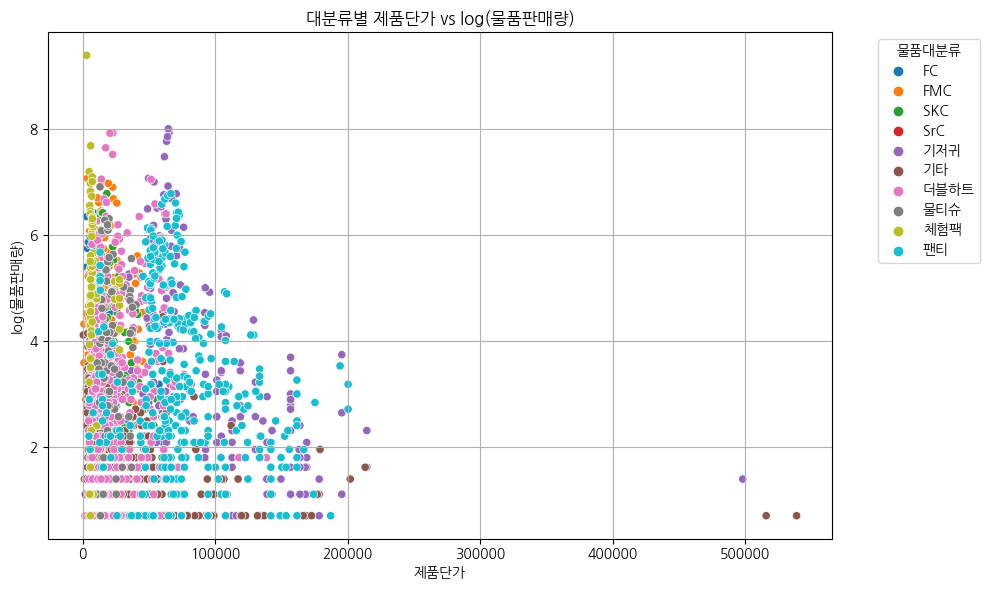

In [94]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cluster,
    x='제품단가',
    y='log_판매량',
    hue='물품대분류',  # 대분류별 색상
    palette='tab10'
)

plt.title('대분류별 제품단가 vs log(물품판매량)')
plt.xlabel('제품단가')
plt.ylabel('log(물품판매량)')
plt.legend(title='물품대분류', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

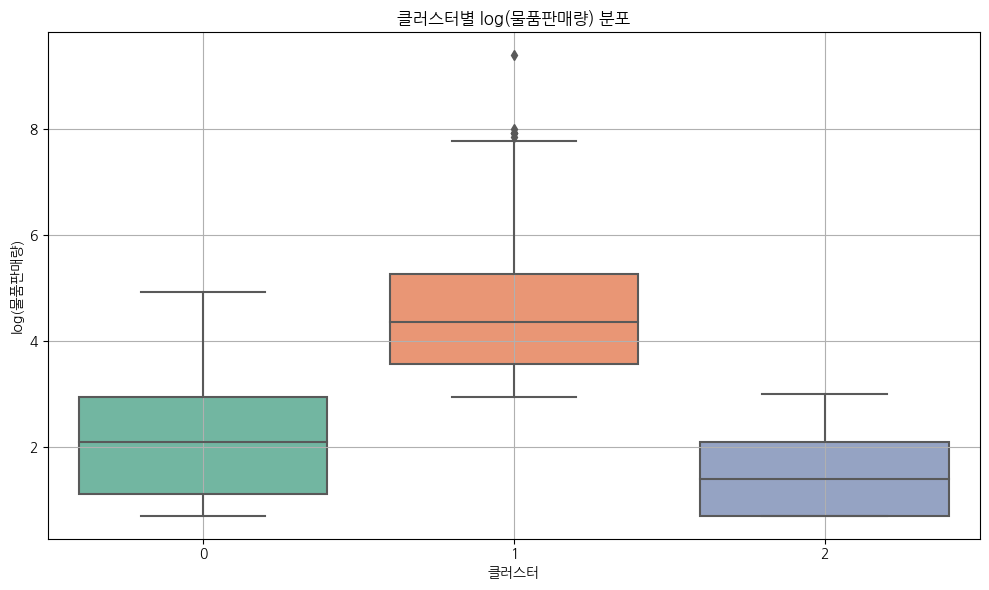

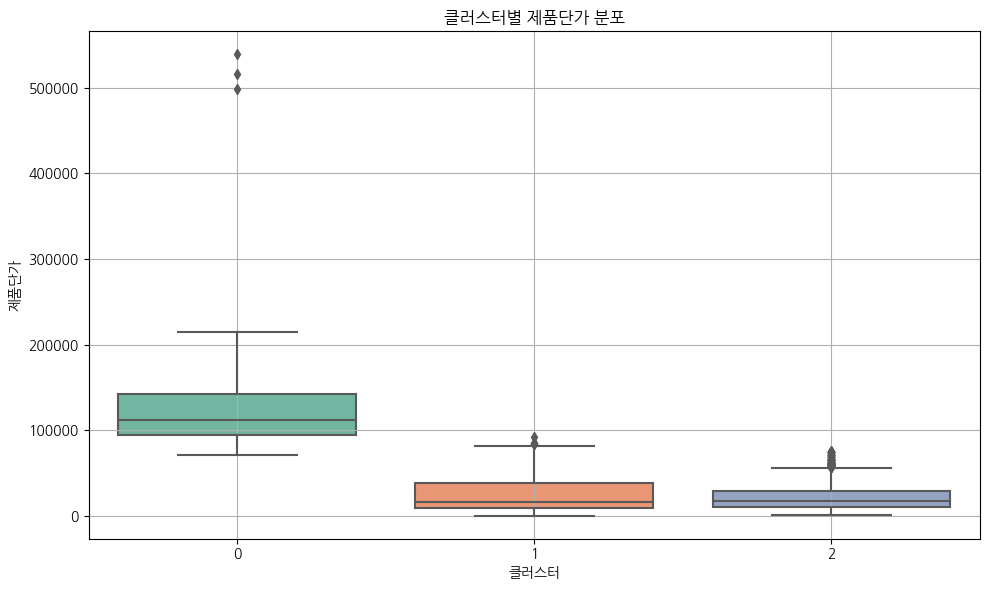

In [95]:
# 판매량 박스플롯
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cluster, x='클러스터', y='log_판매량', palette='Set2')
plt.title('클러스터별 log(물품판매량) 분포')
plt.xlabel('클러스터')
plt.ylabel('log(물품판매량)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 단가 박스플롯
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cluster, x='클러스터', y='제품단가', palette='Set2')
plt.title('클러스터별 제품단가 분포')
plt.xlabel('클러스터')
plt.ylabel('제품단가')
plt.grid(True)
plt.tight_layout()
plt.show()

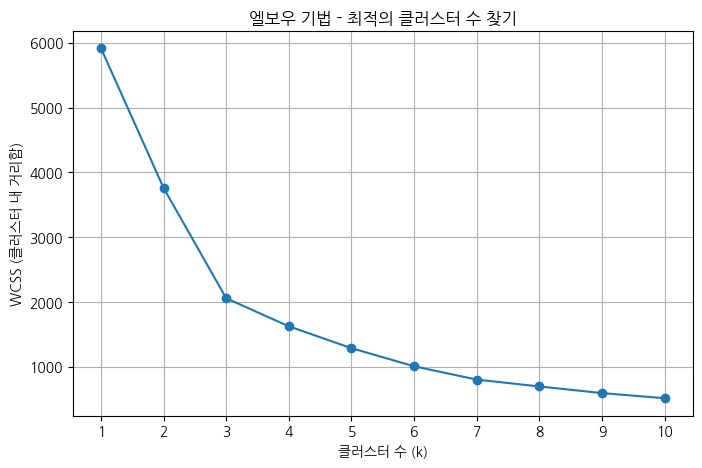

In [96]:
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.title('엘보우 기법 - 최적의 클러스터 수 찾기')
plt.xlabel('클러스터 수 (k)')
plt.ylabel('WCSS (클러스터 내 거리합)')
plt.grid(True)
plt.xticks(K_range)
plt.show()

In [97]:
df_sales = pd.read_csv('Sales_data.csv')

In [98]:
print(df_raw.columns)

Index(['물품대분류', '상품명', '물품판매량', '제품단가'], dtype='object')


In [99]:
print(df_sales.columns)

Index(['주문번호', '배송완료일', '배송시작일', '구매일', '구매시월령', '고객번호', '구매금액', '결제금액',
       '물품대분류', '상품명'],
      dtype='object')


In [100]:
df_raw.columns = df_raw.columns.str.strip()

In [101]:
# 카테고리별 총 결제금액
df_sales.groupby('물품대분류')['결제금액'].sum().sort_values(ascending=False)

물품대분류
기저귀     1575811891
팬티      1175450478
더블하트     642775531
FMC      300028492
체험팩      180344861
물티슈      132758411
기타       125947396
SKC      117051316
FC        92356982
SrC         212480
Name: 결제금액, dtype: int64

In [102]:
# 카테고리별 평균 구매금액
df_sales.groupby('물품대분류')['결제금액'].mean().sort_values(ascending=False)

물품대분류
기저귀     44509.430884
팬티      42496.401952
더블하트    17235.360406
기타      15956.847333
물티슈     15701.763572
SrC     15177.142857
SKC     12480.148843
FMC     11550.219125
FC       7426.582663
체험팩      5081.854740
Name: 결제금액, dtype: float64

In [103]:
# 카테고리별 총 판매수량
df_raw.groupby('물품대분류')['물품판매량'].sum().sort_values(ascending=False)

물품대분류
더블하트    37294
체험팩     35488
기저귀     35404
팬티      27660
FMC     25976
FC      12436
SKC      9379
물티슈      8455
기타       7893
SrC        14
Name: 물품판매량, dtype: int64

In [104]:
# 카테고리별 평균 단가
df_raw.groupby('물품대분류')['제품단가'].mean().sort_values(ascending=False)

물품대분류
기저귀     84308.401786
팬티      68100.734375
SrC     28262.000000
더블하트    25225.337662
기타      23757.938153
물티슈     22150.415584
SKC     20983.672956
FC      15466.890196
FMC     15453.755556
체험팩      7951.853933
Name: 제품단가, dtype: float64

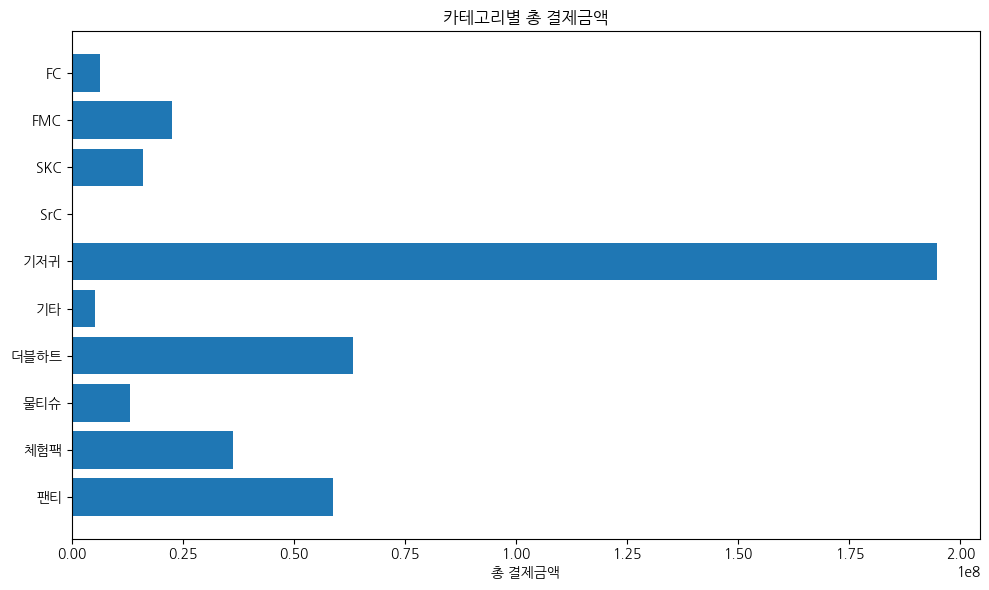

In [105]:
import matplotlib.pyplot as plt

# 총 결제금액 컬럼 생성
df_raw['총결제금액'] = df_raw['물품판매량'] * df_raw['제품단가']

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(df_raw['물품대분류'], df_raw['총결제금액'])
plt.xlabel('총 결제금액')
plt.title('카테고리별 총 결제금액')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

📊 그래프 해석 요약

    1등 매출 품목: 기저귀 → 전체 카테고리 중 압도적 1위

    그 다음 그룹:

        더블하트, 팬티, 체험팩 → 비교적 매출 기여도가 높음

    매출 기여도 낮은 품목들:

        기타, 물티슈, SrC, FC, FMC, SKC → 매출이 매우 낮거나 미미함

✅ 1. 매출 편중 현상 존재

    기저귀에 매출이 과도하게 집중되어 있음

    리스크: 특정 품목에 의존할 경우 품목 단종 / 가격 경쟁 / 공급 이슈에 큰 타격을 입을 수 있음

✅ 2. 중간 기여 품목의 성장 가능성

    더블하트, 팬티, 체험팩은 일정한 매출 비중을 차지하고 있음

        ✅ 타겟 마케팅 강화 시 매출 상승 가능

        📦 교차판매(cross-selling), 번들 구성 등도 고려해볼 수 있음

✅ 3. 저매출 품목 재검토 필요

    기타, SrC, FC, FMC, SKC 등의 품목은 매출 기여도가 거의 없음

        ❌ Dead Stock일 가능성 존재

        ❓ 왜 안 팔리는지 확인 필요:

            가격 문제?

            품질 이슈?

            수요 자체가 없음?

            상품 노출이 부족?

        👉 과감한 정리 or 할인 소진 전략 고려

✅ 4. 상품 리뉴얼 or 리스팅 최적화 필요

    비효율 상품군 제거 후, 기저귀와 시너지가 있는 상품 강화 가능

    예: 기저귀 구매 시 물티슈나 팬티 자동 추천 → 체험팩 제공


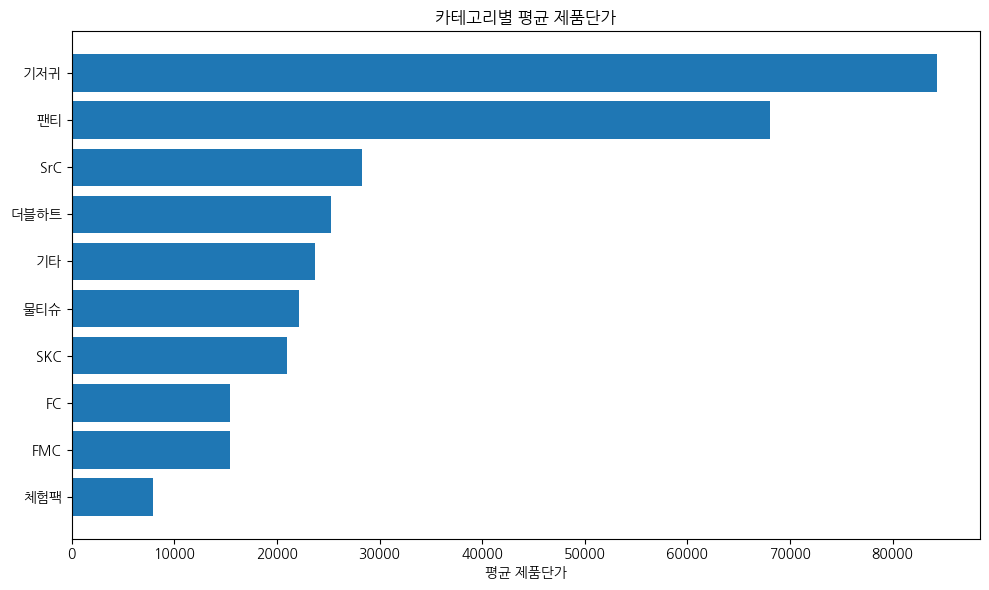

In [106]:
plt.figure(figsize=(10, 6))
avg_price = df_raw.groupby('물품대분류')['제품단가'].mean().sort_values()
plt.barh(avg_price.index, avg_price.values)
plt.xlabel('평균 제품단가')
plt.title('카테고리별 평균 제품단가')
plt.tight_layout()
plt.show()

📊 그래프 해석 요약

    1위: 기저귀 → 평균 단가 약 85,000원

    2위: 팬티 → 약 70,000원 수준

    그 외 중단가: SrC, 더블하트, 기타

    저가 상품군: 체험팩, FMC, FC
    
✅ 1. 고단가 제품 = 매출 주력

    기저귀는 앞서 본 매출 그래프에서도 1위였고, 단가도 가장 높음

    이는 고객당 구매액 자체가 높아 매출에 기여도가 크다는 뜻

    📌 리스크: 고단가 제품군이 가격 민감하면 프로모션 전략이 중요함

✅ 2. 팬티 → 전략적 보완재 가능

    평균 단가가 높고 매출도 괜찮은 편 → 기저귀 다음 주력 카테고리로 키울 수 있음

    기저귀 + 팬티 번들 구성 / 교차 프로모션 전략 제안 가능

✅ 3. 중간 단가군은 상품 다양성 확보가 중요

    더블하트, SrC, 물티슈 등은 가격도 중간이고 매출도 중간

    🧠 이들은 브랜드 충성도 또는 제품 기능성 차별화로 경쟁해야 함

    UX, 후기, 노출위치 등이 영향을 크게 미칠 수 있음

✅ 4. 저단가 상품 = 체험용 / 미끼 상품으로 활용 가능

    체험팩, FMC, FC는 가격이 낮고 매출도 낮았음

    📌 하지만 전환 유도 / 신규 고객 유입에는 효과적일 수 있음

    ✅ 첫 구매 유도 / 랜딩페이지에 배치 / 리뷰 유도에 활용

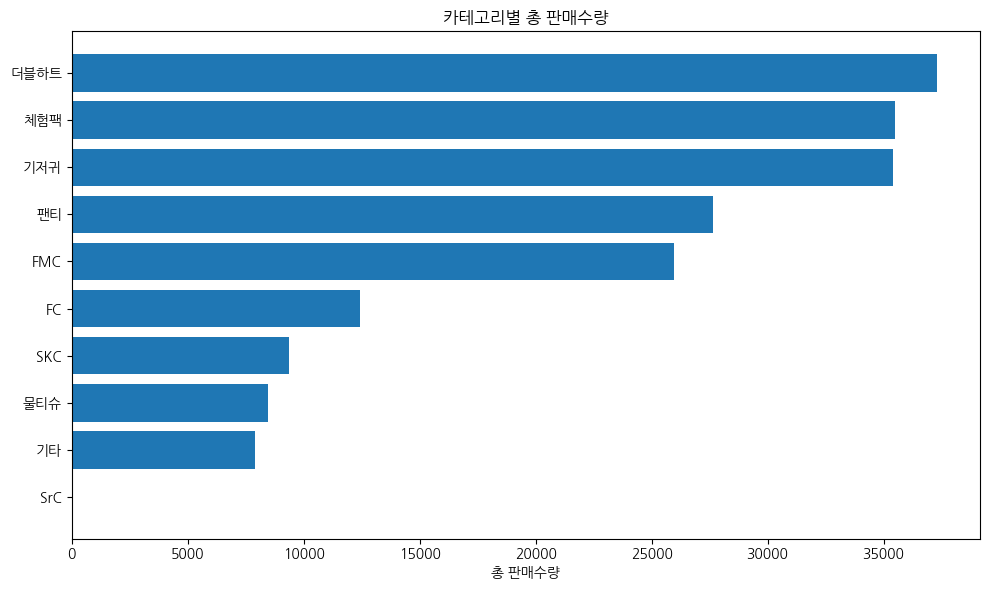

In [107]:
plt.figure(figsize=(10, 6))
total_qty = df_raw.groupby('물품대분류')['물품판매량'].sum().sort_values()
plt.barh(total_qty.index, total_qty.values)
plt.xlabel('총 판매수량')
plt.title('카테고리별 총 판매수량')
plt.tight_layout()
plt.show()

📊 그래프 해석 요약

    판매수량 1~3위:
    더블하트, 체험팩, 기저귀
    → 단가가 다소 낮아도 수량이 많아 매출을 견인

    중간권:
    팬티, FMC

    낮은 수량:
    SrC, 기타, 물티슈, SKC, FC
    
 🔍 인사이트 도출
✅ 1. 더블하트, 체험팩 → 저단가 다량판매 상품

    매출 1등은 아니지만, 수량 기준으로는 압도적으로 많이 팔림

    고객들이 접근하기 쉬운 가격대 & 브랜드력 or 실용성 있음

    📌 이들은 유입 유도용 / 리뷰 유도 / 패키지 구성에 활용 가능

✅ 2. 기저귀 → 고단가 + 고수량 = 핵심 매출 견인 상품

    앞선 분석에서 단가도 높고, 수량도 높은 유일한 품목

    재고 관리, 공급 안정성, 로열티 전략이 매우 중요

    이 제품군만 따로 마케팅 팀 짜도 될 정도로 영향력 있음

✅ 3. 체험팩 → 가격 낮지만 수량 많음 → 미끼상품 or 첫 구매 유도

    의도적으로 고객 진입 유도용으로 사용된 흔적이 있음

    첫 구매 전환률 / 재구매 전환 분석을 같이 해보면 전략 평가 가능

✅ 4. 수량 낮은 카테고리 → Dead stock 가능성

    SrC, 기타, 물티슈, SKC, FC

        판매도 적고 앞선 분석에서 매출 기여도도 낮음

        ❗ 정리 대상 or 집중 프로모션 필요

In [108]:
import pandas as pd

# 구매 기준일 최신 날짜 설정
기준일 = pd.to_datetime(df_sales['구매일']).max()

# 고객별 RFM 계산
rfm = df_sales.groupby('고객번호').agg({
    '구매일': lambda x: (기준일 - pd.to_datetime(x).max()).days,
    '주문번호': 'nunique',
    '결제금액': 'sum'
}).reset_index()

rfm.columns = ['고객번호', 'Recency', 'Frequency', 'Monetary']

In [109]:
# RFM 점수를 1~4등급으로 나누기 (1: 가장 우수)
rfm['R_score'] = pd.qcut(rfm['Recency'], q=5, labels=[5, 4, 3, 2, 1])
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])
rfm['M_score'] = pd.qcut(rfm['Monetary'], q=5, labels=[1, 2, 3, 4, 5])

# RFM 그룹 태그 만들기
rfm['RFM_Group'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
rfm['RFM_Score'] = rfm[['R_score', 'F_score', 'M_score']].astype(int).sum(axis=1)

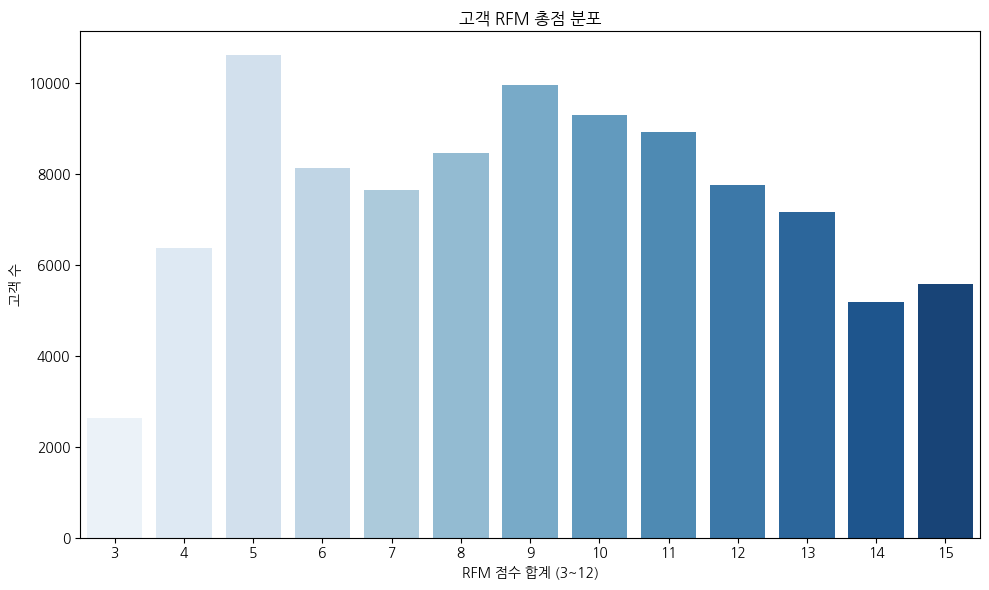

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='RFM_Score', data=rfm, palette='Blues')
plt.title('고객 RFM 총점 분포')
plt.xlabel('RFM 점수 합계 (3~12)')
plt.ylabel('고객 수')
plt.tight_layout()
plt.show()

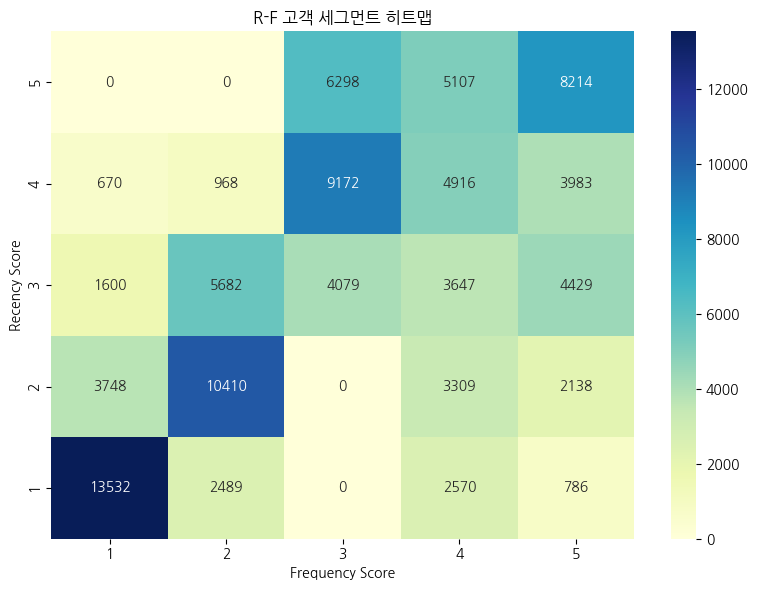

In [111]:
rfm_group = rfm.groupby(['R_score', 'F_score']).size().unstack()

plt.figure(figsize=(8, 6))
sns.heatmap(rfm_group, annot=True, fmt='d', cmap='YlGnBu')
plt.title('R-F 고객 세그먼트 히트맵')
plt.xlabel('Frequency Score')
plt.ylabel('Recency Score')
plt.tight_layout()
plt.show()

In [112]:
# R, F, M 점수 정수형으로 변환
rfm[['R_score', 'F_score', 'M_score']] = rfm[['R_score', 'F_score', 'M_score']].astype(int)

# RFM 총합 점수 계산
rfm['RFM_Score'] = rfm[['R_score', 'F_score', 'M_score']].sum(axis=1)

In [113]:
# RFM 총점을 기준으로 5분위로 등급화 (duplicates='drop'을 꼭 추가!)
rfm['고객등급'] = pd.qcut(rfm['RFM_Score'], q=5, labels=['E', 'D', 'C', 'B', 'A'], duplicates='drop')

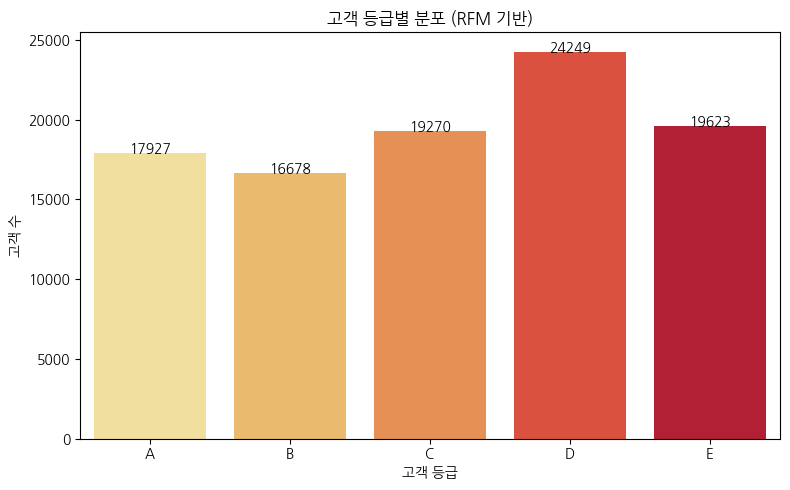

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='고객등급', data=rfm, order=['A', 'B', 'C', 'D', 'E'], palette='YlOrRd')
plt.title('고객 등급별 분포 (RFM 기반)')
plt.xlabel('고객 등급')
plt.ylabel('고객 수')

# 막대 위에 숫자 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, f'{int(height)}', ha="center")

plt.tight_layout()
plt.show()

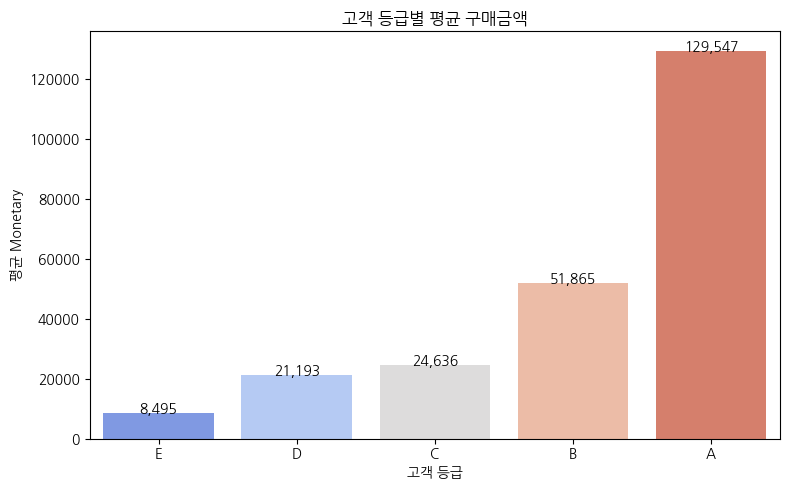

In [115]:
group_avg = rfm.groupby('고객등급')['Monetary'].mean().sort_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=group_avg.index, y=group_avg.values, palette='coolwarm')
plt.title('고객 등급별 평균 구매금액')
plt.xlabel('고객 등급')
plt.ylabel('평균 Monetary')

# 막대 위에 숫자 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, f'{height:,.0f}', ha="center")

plt.tight_layout()
plt.show()

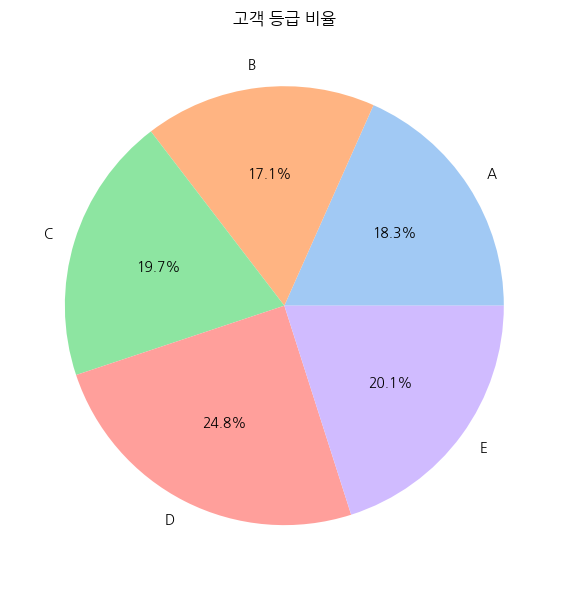

In [134]:
grade_counts = rfm['고객등급'].value_counts().reindex(['A', 'B', 'C', 'D', 'E'])

plt.figure(figsize=(6, 6))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('고객 등급 비율')
plt.tight_layout()
plt.show()

In [116]:
merged = df_sales.merge(df_raw[['상품명', '물품대분류', '제품단가']], on='상품명', how='left')

In [117]:
merged.head()

,주문번호,배송완료일,배송시작일,구매일,구매시월령,고객번호,구매금액,결제금액,물품대분류_x,상품명,물품대분류_y,제품단가
0,901011864201303,2023-01-06,2023-01-02,2023-01-01,35.0,201901010750089,74560,43825,팬티,하기스 매직핏팬티 5단계 남아 124매(팬티형),팬티,81427
1,901011864430366,2023-01-04,2023-01-02,2023-01-01,9.0,201901010750143,74560,43825,팬티,하기스 매직핏팬티 3단계 남아 184매(팬티형),팬티,74560
2,81231186197954,2023-01-06,2023-01-02,2023-01-01,22.0,201812310749820,53920,36769,팬티,하기스 네이처메이드 팬티 5단계 여아 80매(팬티형),팬티,69917
3,812311863500220,2023-01-04,2023-01-02,2023-01-01,8.0,201812310750007,52160,32408,팬티,하기스 보송보송팬티 4단계 공용 124매(팬티형),팬티,57811
4,812311863220192,2023-01-04,2023-01-02,2023-01-01,23.0,201812310749977,47360,30066,팬티,하기스 에어솔솔 팬티 5단계 남아용 80매(팬티형),팬티,68994


In [118]:
top_products = merged.groupby('상품명')['결제금액'].sum().sort_values(ascending=False)

In [119]:
import datetime as dt
import pandas as pd

# 1. 날짜 형식 변환 먼저!
merged['구매일'] = pd.to_datetime(merged['구매일'])

# 2. 기준일 설정
기준일 = merged['구매일'].max()

# 3. 상품별 마지막 판매일 계산
dead_products = merged.groupby('상품명')['구매일'].max()

# 4. 최근 180일간 판매 없는 상품 필터링
dead_products = dead_products[dead_products < (기준일 - pd.Timedelta(days=180))]

In [120]:
dead_df = df_raw[df_raw['상품명'].isin(dead_products.index)]

posx and posy should be finite values
posx and posy should be finite values


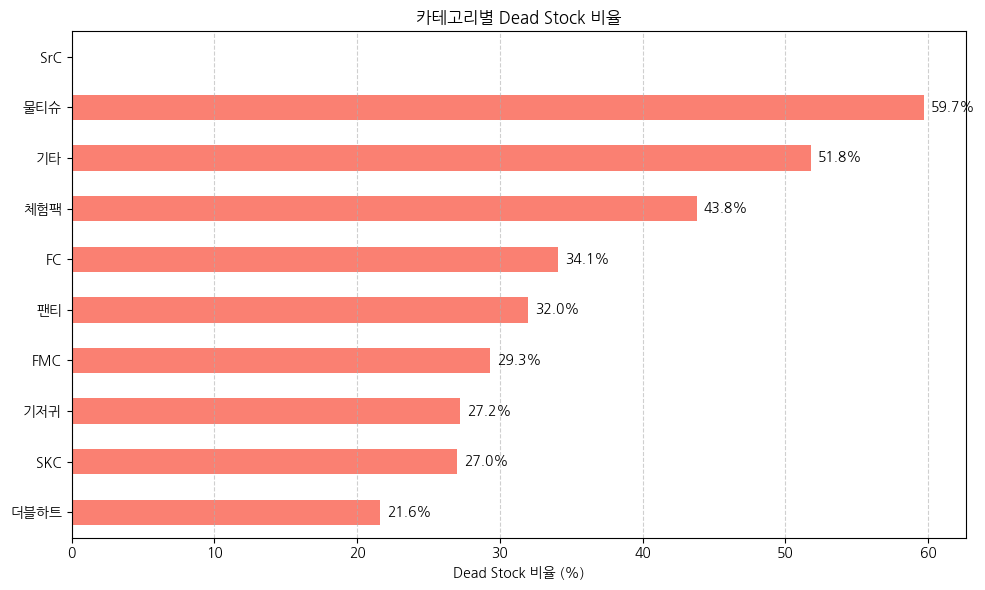

In [121]:
# 카테고리별 Dead Stock 수
dead_by_cat = dead_df['물품대분류'].value_counts()

# 전체 카테고리별 상품 수
total_by_cat = df_raw['물품대분류'].value_counts()

# Dead Stock 비율 계산
dead_ratio = (dead_by_cat / total_by_cat * 100).round(1).sort_values()

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = dead_ratio.plot(kind='barh', color='salmon')
plt.xlabel('Dead Stock 비율 (%)')
plt.title('카테고리별 Dead Stock 비율')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# 막대 위에 숫자 표기
for i, v in enumerate(dead_ratio):
    plt.text(v + 0.5, i, f'{v}%', va='center')

plt.tight_layout()
plt.show()

In [127]:
merged.columns = merged.columns.str.strip()
print(merged.columns)

Index(['주문번호', '배송완료일', '배송시작일', '구매일', '구매시월령', '고객번호', '구매금액', '결제금액',
       '물품대분류_x', '상품명', '물품대분류_y', '제품단가'],
      dtype='object')


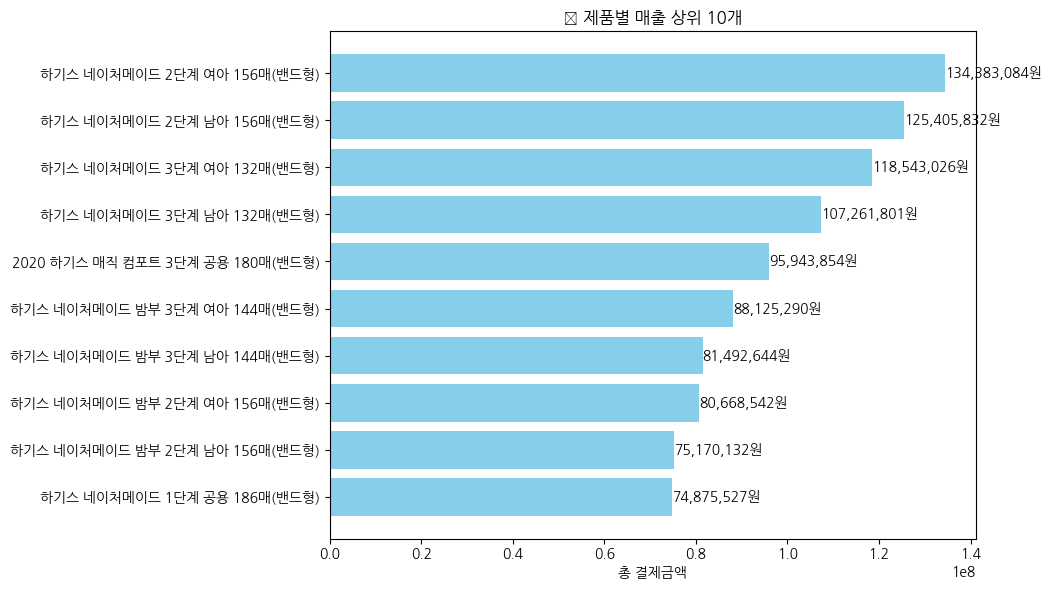

In [131]:
# 제품별 매출 총합 계산
top_products = merged.groupby('상품명')['결제금액'].sum().sort_values(ascending=False)

# 상위 10개 상품만 추출
top_10_products = top_products.head(10)

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_products.index[::-1], top_10_products.values[::-1], color='skyblue')
plt.title('💸 제품별 매출 상위 10개')
plt.xlabel('총 결제금액')
plt.tight_layout()

# 막대 위에 숫자 표기
for i, v in enumerate(top_10_products.values[::-1]):
    plt.text(v + 1000, i, f'{int(v):,}원', va='center')

plt.show()

In [138]:
# 1. 등급 정보 붙이기
merged_rfm = merged.merge(rfm[['고객번호', '고객등급']], on='고객번호', how='left')

# 2. 등급별로 상품별 매출 계산
top_products_by_grade = (
    merged_rfm.groupby(['고객등급', '상품명'])['결제금액']
    .sum()
    .reset_index()
)

# 3. 각 등급별로 매출 상위 5개만 추출
top_5_by_grade = (
    top_products_by_grade
    .sort_values(['고객등급', '결제금액'], ascending=[True, False])
    .groupby('고객등급')
    .head(5)
)

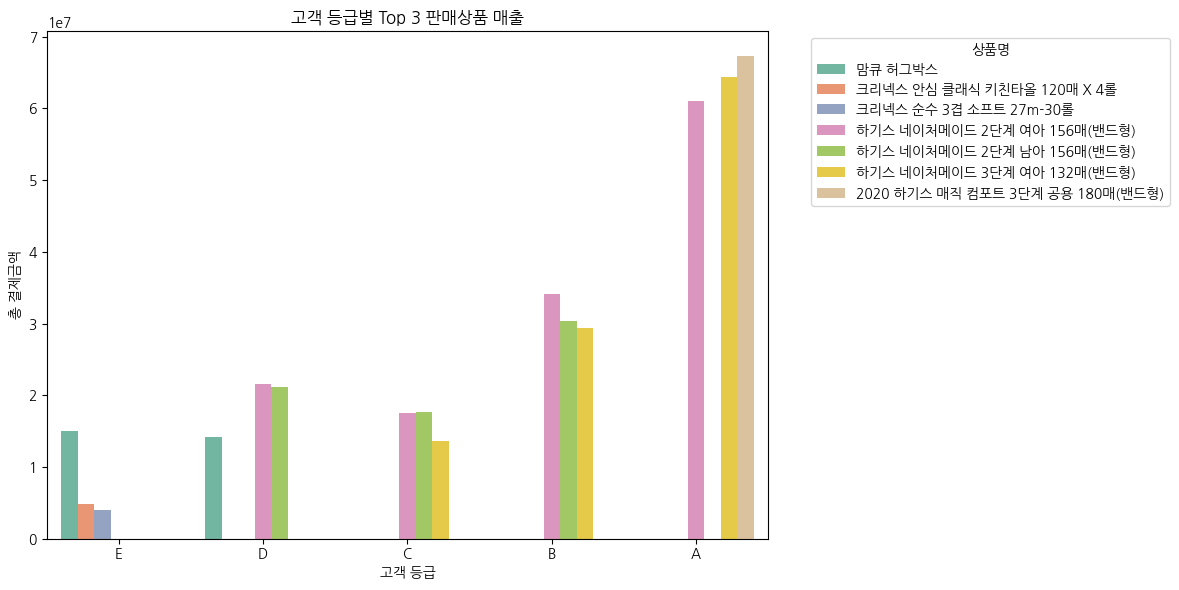

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 등급 정보 병합
merged_rfm = merged.merge(rfm[['고객번호', '고객등급']], on='고객번호', how='left')

# 2. 고객등급별 상품별 매출 집계
top_products_by_grade = (
    merged_rfm.groupby(['고객등급', '상품명'])['결제금액']
    .sum()
    .reset_index()
)

# 3. 등급별 매출 Top 3 상품 추출
top_3_by_grade = (
    top_products_by_grade
    .sort_values(['고객등급', '결제금액'], ascending=[True, False])
    .groupby('고객등급')
    .head(3)
)

# 4. 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=top_3_by_grade, x='고객등급', y='결제금액', hue='상품명', palette='Set2')
plt.title('고객 등급별 Top 3 판매상품 매출')
plt.xlabel('고객 등급')
plt.ylabel('총 결제금액')
plt.legend(title='상품명', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

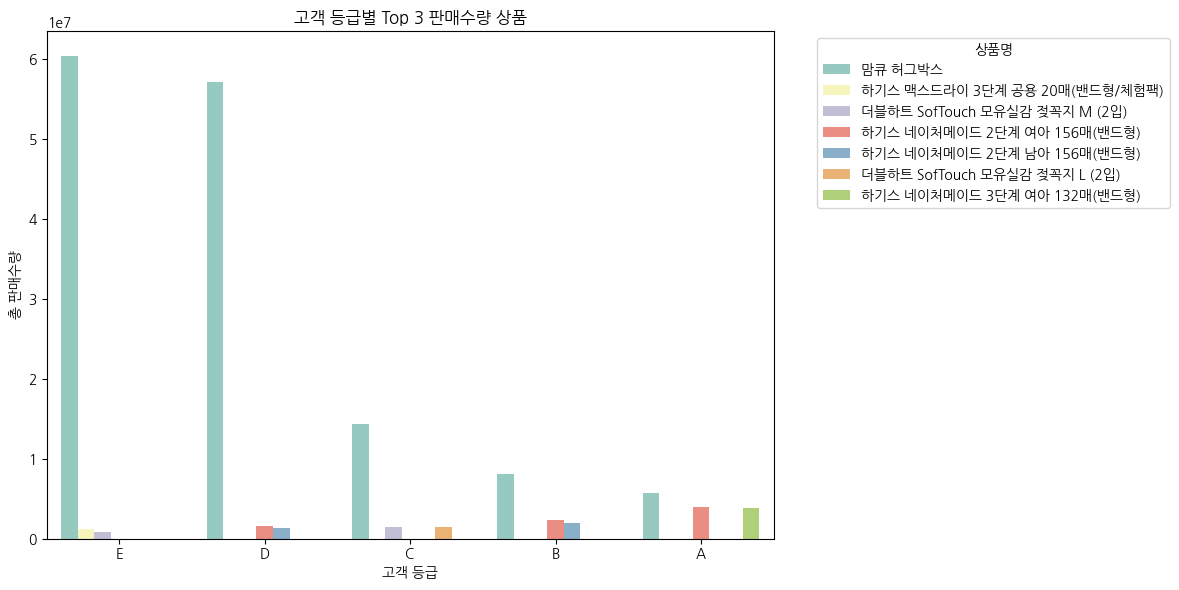

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. rfm 등급 정보 병합
merged_rfm = merged.merge(rfm[['고객번호', '고객등급']], on='고객번호', how='left')

# 2. 고객등급별 상품별 총 판매수량 집계
top_qty_by_grade = (
    merged_rfm.groupby(['고객등급', '상품명'])['물품판매량']
    .sum()
    .reset_index()
)

# 3. 등급별 판매수량 Top 3 상품 추출
top_3qty_by_grade = (
    top_qty_by_grade
    .sort_values(['고객등급', '물품판매량'], ascending=[True, False])
    .groupby('고객등급')
    .head(3)
)

# 4. 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=top_3qty_by_grade, x='고객등급', y='물품판매량', hue='상품명', palette='Set3')
plt.title('고객 등급별 Top 3 판매수량 상품')
plt.xlabel('고객 등급')
plt.ylabel('총 판매수량')
plt.legend(title='상품명', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [142]:
# 상품별 평균 단가 계산
product_price_avg = merged.groupby('상품명')['제품단가'].mean().sort_values(ascending=False)

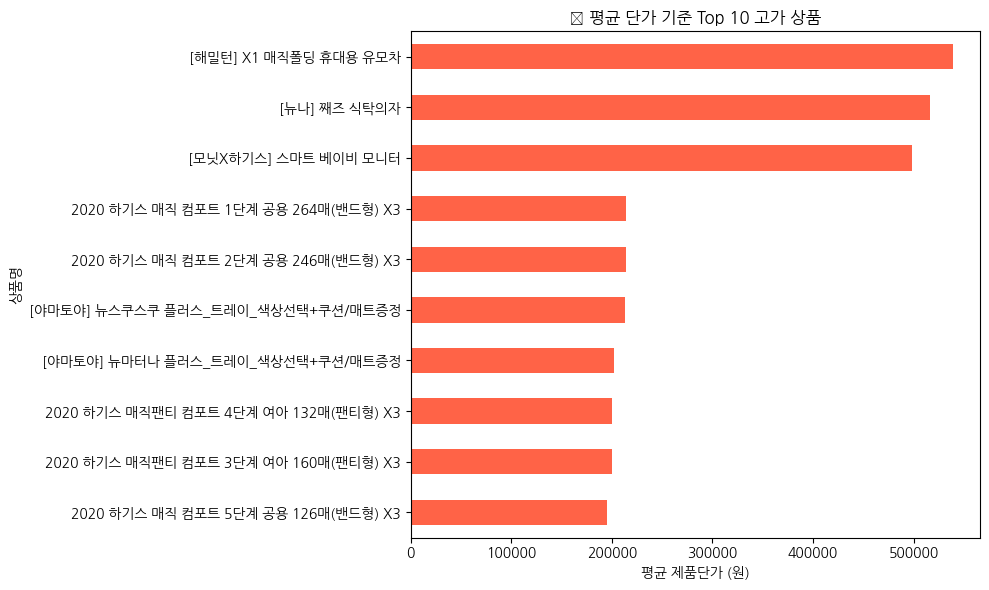

In [143]:
import matplotlib.pyplot as plt

top10_expensive = product_price_avg.head(10)

plt.figure(figsize=(10, 6))
top10_expensive[::-1].plot(kind='barh', color='tomato')
plt.title('💸 평균 단가 기준 Top 10 고가 상품')
plt.xlabel('평균 제품단가 (원)')
plt.tight_layout()
plt.show()

In [158]:
df_raw.shape

(3048, 5)

In [159]:
df_sales.shape

(199999, 10)

In [156]:
merged.shape

(210039, 11)

In [160]:
# 상품명 중복 개수 확인
dup_counts = df_raw['상품명'].value_counts()
print(dup_counts[dup_counts > 1])

하기스 네이처메이드 5단계 여아 92매(밴드형)            2
디펜드 안심플러스 언더웨어 중형 54매                 2
NEW 하기스 네이처메이드 1단계 공용 186매(밴드형) X2    2
NEW 하기스 네이처메이드 1단계 공용 186매(밴드형) X3    2
NEW 하기스 네이처메이드 2단계 남아 156매(밴드형)       2
                                     ..
하기스 네이처메이드 밤부 3단계 남아 144매(밴드형)        2
하기스 네이처메이드 밤부 1단계 공용 186매(밴드형)        2
하기스 네이처메이드 팬티 4단계 여아 96매(팬티형) X2      2
하기스 네이처메이드 5단계 남아 92매(밴드형)            2
하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)        2
Name: 상품명, Length: 73, dtype: int64


In [161]:
df_raw_unique = df_raw.drop_duplicates(subset='상품명')
merged = df_sales.merge(df_raw_unique, on='상품명', how='left')

In [162]:
merged.shape

(199999, 14)